In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import pylab as pl
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/exports/home/paval/papers/frontiers23/conda_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
links

0        1237
300      2474
600      3711
900      4948
1200     6185
1500     7423
1800     8660
2100     9897
2400    11134
2700    12371
3000    13608
3300    14846
3600    16083
3900    17320
4200    18557
4500    19794
4800    21032
5100    22269
5400    23506
5700    24743
6000    25980
6300    27217
6600    28455
6900    29692
7200    30929
7500    32166
7800    33403
8100    34640
8400    35878
8700    37115
9000    38352
9300    39589
9600    40826
Name: links, dtype: int64

/tmp/ipykernel_2211/173869025.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('inferno_r')


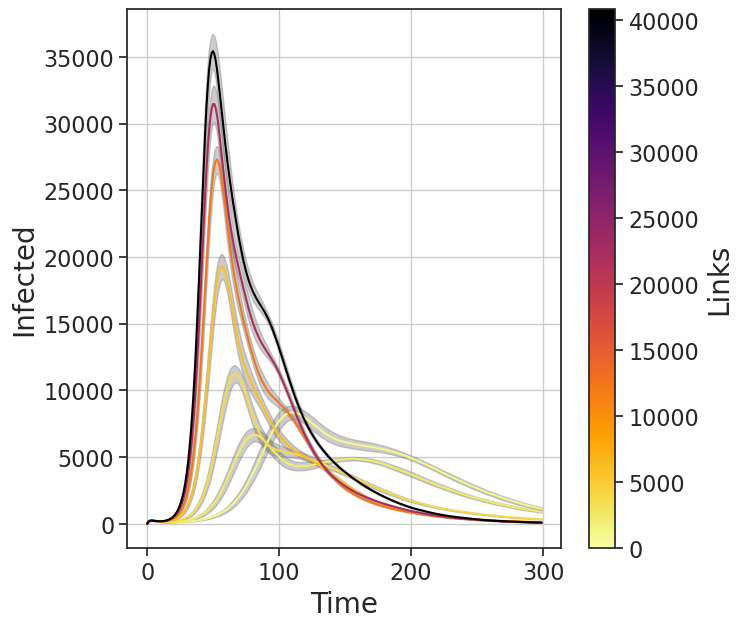

In [35]:
data = pd.read_csv('confinement/out/trajectories/ma_beta_4,0.txt', sep='\t', names=['links', 'time', 'infected', 'error'])

links = data['links'].drop_duplicates()
links = links[links.isin([1237, 2474, 3711, 6185, 12371, 22269, 40826])]

colors = cm.get_cmap('inferno_r')

sns.set_theme(style="ticks")
fig,ax = plt.subplots(figsize=(7, 7))
ax
for l in links:
    ax.plot('time', 'infected', color = colors((l)/(links.max())), data=data[data['links'] == l],
        label=l)
    ax.fill_between(x=data[data['links'] == l]['time'], y1=data[data['links'] == l]['infected']+ 2*data[data['links'] == l]['error'],
        y2=data[data['links'] == l]['infected']-2*data[data['links'] == l]['error'], color='gray', alpha=0.4) 
sm = plt.cm.ScalarMappable(cmap=colors, norm=Normalize(0, links.max()))
cbar=fig.colorbar(sm, ax=ax)


ax.set_xlabel('Time', size=20)
ax.set_ylabel('Infected', size=20)
ax.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Links', size=20)

ax.grid('True')

# plt.savefig('prueba.png', bbox_inches="tight")